<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p4_FunctionalAPI_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Median house prices for California districts derived from the 1990 census.

In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import regularizers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import os

In [2]:
np.random.seed(21)
tf.random.set_seed(21)

In [3]:
housing=fetch_california_housing()
x_train, x_test, y_train, y_test=train_test_split(housing.data, housing.target,
                                                        test_size=0.2, random_state=21 )


In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [6]:
x_train.shape, x_test.shape

((16512, 8), (4128, 8))

In [7]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
input_a=keras.layers.Input(shape=[5]) #6 features from 0 to 4
input_b=keras.layers.Input(shape=[6]) #5 features from 2 to 7

hid1=keras.layers.Dense(30, activation='relu')(input_b)
hid2=keras.layers.Dense(30, activation='relu')(hid1)

concat=keras.layers.concatenate([input_a, hid2])
output=keras.layers.Dense(1)(concat)

model=keras.models.Model(inputs=[input_a, input_b], outputs=[output])

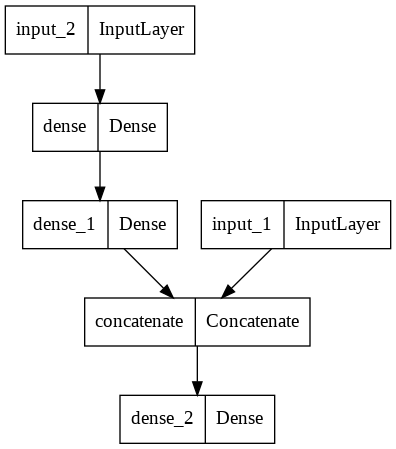

In [9]:
keras.utils.plot_model(model,)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [11]:
model.compile(loss=['mse','mse'],
              loss_weights=[0.8,0.2],
              optimizer='sgd')

checkpoint=keras.callbacks.ModelCheckpoint('p4.FunctionalAPI.california_housing.h5',
                                           save_best_only=True)

early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=4,
                                             restore_best_weights=True)

In [12]:
x_train_a, x_train_b= x_train[:,:5], x_train[:,2:]
x_test_a, x_test_b= x_test[:,:5], x_test[:,2:]

x_new_a, x_new_b= x_test[:2,:5], x_test[:2,2:]

In [13]:
model.fit([x_train_a,x_train_b],[y_train, y_train],
          epochs=15,
          validation_split=0.2,
          callbacks=[checkpoint, early_stopping])
          

Epoch 1/15
413/413 [==============================] - 3s 5ms/step - loss: 0.7177 - val_loss: 0.4278
Epoch 2/15
413/413 [==============================] - 2s 4ms/step - loss: 0.4506 - val_loss: 0.3908
Epoch 3/15
413/413 [==============================] - 2s 5ms/step - loss: 0.4040 - val_loss: 0.3718
Epoch 4/15
413/413 [==============================] - 2s 4ms/step - loss: 0.3774 - val_loss: 0.3940
Epoch 5/15
413/413 [==============================] - 2s 5ms/step - loss: 0.3893 - val_loss: 0.3583
Epoch 6/15
413/413 [==============================] - 2s 5ms/step - loss: 0.3817 - val_loss: 0.3478
Epoch 7/15
413/413 [==============================] - 1s 2ms/step - loss: 0.3616 - val_loss: 0.3378
Epoch 8/15
413/413 [==============================] - 1s 2ms/step - loss: 0.4186 - val_loss: 0.3326
Epoch 9/15
413/413 [==============================] - 1s 2ms/step - loss: 0.3520 - val_loss: 0.3261
Epoch 10/15
413/413 [==============================] - 1s 2ms/step - loss: 0.3368 - val_loss: 0.3212

In [14]:
model.evaluate([x_test_a, x_test_b],y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3124


0.3123571574687958

In [15]:
model.predict([x_new_a, x_new_b])

array([[0.5860106],
       [0.7864795]], dtype=float32)

Adding an auxiliary output for regularization:

In [16]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

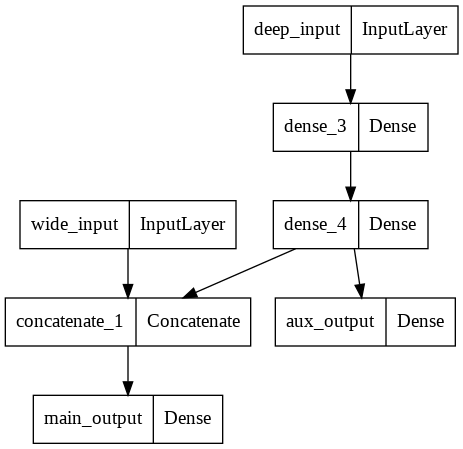

In [17]:
keras.utils.plot_model(model)

In [18]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer='sgd')

In [19]:
model.fit([x_train_a, x_train_b], [y_train, y_train], 
          epochs=15,
          validation_split=0.2)

Epoch 1/15
413/413 [==============================] - 2s 3ms/step - loss: 0.9134 - main_output_loss: 0.8312 - aux_output_loss: 1.6538 - val_loss: 0.5560 - val_main_output_loss: 0.4994 - val_aux_output_loss: 1.0652
Epoch 2/15
413/413 [==============================] - 1s 2ms/step - loss: 0.5678 - main_output_loss: 0.5236 - aux_output_loss: 0.9650 - val_loss: 0.5024 - val_main_output_loss: 0.4600 - val_aux_output_loss: 0.8841
Epoch 3/15
413/413 [==============================] - 1s 2ms/step - loss: 0.5198 - main_output_loss: 0.4853 - aux_output_loss: 0.8308 - val_loss: 0.4805 - val_main_output_loss: 0.4475 - val_aux_output_loss: 0.7779
Epoch 4/15
413/413 [==============================] - 1s 2ms/step - loss: 0.4909 - main_output_loss: 0.4620 - aux_output_loss: 0.7517 - val_loss: 0.4736 - val_main_output_loss: 0.4477 - val_aux_output_loss: 0.7071
Epoch 5/15
413/413 [==============================] - 1s 2ms/step - loss: 0.4787 - main_output_loss: 0.4543 - aux_output_loss: 0.6980 - val_loss

In [20]:
total_loss, main_loss, aux_loss=model.evaluate([x_test_a, x_test_b])
total_loss, main_loss, aux_loss

129/129 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - main_output_loss: 0.0000e+00 - aux_output_loss: 0.0000e+00


(0.0, 0.0, 0.0)

In [21]:
y_pred_main, y_pred_aux= model.predict([x_new_a, x_new_b])
print('y_pred_main:', y_pred_main)
print('y_pred_aux:', y_pred_aux)

y_pred_main: [[0.5774529]
 [0.7753042]]
y_pred_aux: [[1.1281111]
 [1.0801555]]
